## Imports 

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import hstdata.stsci as stsci
import hstdata.analysis as anly

%matplotlib inline

/usr/local/lib/python3.7/site-packages/lenstools/utils/mpi.py:15: UserWarning: Could not import mpi4py! (if you set sys.modules['mpi4py']=None please disregard this message)
  warnings.warn(wmsg)
/usr/local/lib/python3.7/site-packages/lenstools/statistics/ensemble.py:943: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  class Panel(pd.Panel):


## Handles on map sets 

In [47]:
ct = stsci.Abell2744("cats","v4.1")
br = stsci.Abell2744("bradac","v2")
wi = stsci.Abell2744("williams","v4")
gl = stsci.Abell2744("glafic","v4")

## Measure power spectrum upon map loading

In [53]:
ell_bins = np.linspace(1e5,1e6,20)
ell_mid = 0.5*(ell_bins[1:] + ell_bins[:-1])

In [4]:
def measureKappaPower(img):
    ell,p = img.powerSpectrum(ell_bins)
    return p

## Power spectrum measurements: observations 

In [15]:
p = ct.loadKappaMap(0,callback=measureKappaPower)

In [52]:
for mth in (ct,br,wi,gl):
    print("[+] Measuring power spectrum of observation set: "+mth.datapath)
    pmth = np.array([ mth.loadKappaMap(i,callback=measureKappaPower) for i in mth.realizations ])
    savepath = os.path.join(mth.datapath,"power_kk.npy")
    print("[+] Saving to: "+savepath)
    np.save(savepath,pmth)

[+] Measuring power spectrum of observation set: abell2744/models/glafic/v4
[+] Saving to: abell2744/models/glafic/v4/power_kk.npy


## Plot power spectrum: observations 

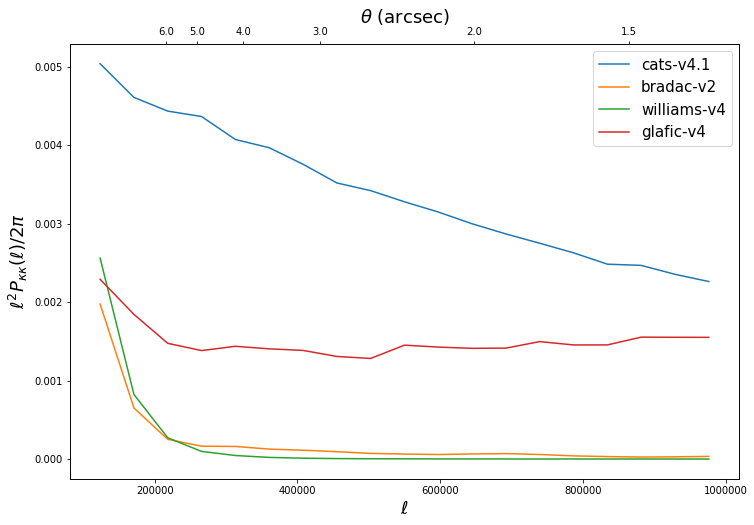

In [73]:
for i,mth in enumerate((ct,br,wi,gl)):
    pmth = np.load(os.path.join(mth.datapath,"power_kk.npy"))
    if i==0:
        fig,ax = anly.plotPowerSpectrum(ell_mid,pmth.mean(0),label="-".join([mth.method,mth.version]))
    else:
        fig,ax = anly.plotPowerSpectrum(ell_mid,pmth.mean(0),ax=ax,label="-".join([mth.method,mth.version]))

ax.legend(prop={'size':15})